# Credit Card Fraud Detection using an Auto-Encoder

Throughout this section, we will once again be dealing with the problem of credit card fraud. This dataset contains records of actual credit card transactions with anonymized features; however, it does not lend itself much to feature engineering. Therefore, we will have to rely on end-to-end learning methods in order to build a good fraud detector.

In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf

In [2]:
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

In [3]:
df = pd.read_csv('./data/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

As usual, we first load the data. The Time feature shows the absolute time of the transaction, which makes the data a bit hard to deal with here. Therefore, we will just drop it, which we can do by running:

In [7]:
df = df.drop('Time',axis=1)

We then separate the X data on the transaction from the classification of the transaction and extract the NumPy array that underlies the pandas DataFrame:

In [8]:
X = df.drop('Class',axis=1).values 
y = df['Class'].values

In [9]:
X.shape

(284807, 29)

Now we need to scale the features. Feature scaling makes it easier for our model to learn a good representation of the data. This time around, we're going employ a slightly different method of feature scaling than what we did before. We'll scale all features to be between zero and one, as opposed to having a mean of zero and a standard deviation of one. By doing this, we ensure that there are neither any very high nor very low values in the dataset.

We must be aware that this method is susceptible to outliers influencing the result. For each column, we first subtract the minimum value, so that the new minimum value becomes zero. Next, we divide by the maximum value so that the new maximum value becomes one.

By specifying axis=0, we perform the scaling column-wise:

In [10]:
X -= X.min(axis=0)
X /= X.max(axis=0)

In [11]:
X.mean()

0.5213456986251124

In [12]:
X.shape

(284807, 29)

Then, finally, we split our data:

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.1)

We then create an autoencoder. Our input now has 29 dimensions, which we compress down to 12 dimensions before aiming to restore the original 29-dimensional output.

While 12 dimensions is a somewhat arbitrary choice here, it allows for enough capacity to capture all the relevant information while still significantly compressing the data:

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

We are going to use the sigmoid activation function for the decoded data. This is only possible because we've scaled the data to have values between zero and one. We are also using a tanh activation within the encoded layer. This is just a style choice that worked well in experiments and ensures that encoded values are all between minus one and one. With that being said, you may use different activation functions depending on your individual needs.

If you are working with images or deeper networks, a ReLU activation is usually a good choice. However, if you are working with a shallower network, as we are doing here, then a tanh activation often works well:

In [15]:
data_in = Input(shape=(29,))
encoded = Dense(12,activation='tanh')(data_in)
decoded = Dense(29,activation='sigmoid')(encoded)
autoencoder = Model(data_in,decoded)

In this example, we've used a mean squared error loss. This seems a bit of an unusual choice at first, using a sigmoid activation with a mean squared error loss, yet it makes sense. Most people think that sigmoid activations have to be used with a cross-entropy loss, but cross-entropy loss encourages values to either be zero or one, which works well for classification tasks where this is the case.

In our credit card example, most values will be around 0.5. Mean squared error, which we can see being implemented in the code below, is better at dealing with values where the target is not binary, but on a spectrum. Binary cross entropy forces values to be close to zero and one, which is not what we always want:

In [16]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error')

In [17]:
autoencoder.fit(X_train,
                X_train,
                epochs = 20, 
                batch_size=128, 
                validation_data=(X_test,X_test))

Epoch 1/20
2003/2003 [==============================] - 5s 2ms/step - loss: 0.0034 - val_loss: 0.0015
Epoch 2/20
2003/2003 [==============================] - 4s 2ms/step - loss: 0.0012 - val_loss: 8.7062e-04
Epoch 3/20
2003/2003 [==============================] - 5s 3ms/step - loss: 6.8166e-04 - val_loss: 5.4001e-04
Epoch 4/20
2003/2003 [==============================] - 4s 2ms/step - loss: 4.9048e-04 - val_loss: 4.3189e-04
Epoch 5/20
2003/2003 [==============================] - 5s 2ms/step - loss: 3.4264e-04 - val_loss: 3.0333e-04
Epoch 6/20
2003/2003 [==============================] - 5s 2ms/step - loss: 2.7520e-04 - val_loss: 2.5809e-04
Epoch 7/20
2003/2003 [==============================] - 5s 2ms/step - loss: 2.4566e-04 - val_loss: 2.4060e-04
Epoch 8/20
2003/2003 [==============================] - 5s 2ms/step - loss: 2.3146e-04 - val_loss: 2.2832e-04
Epoch 9/20
2003/2003 [==============================] - 5s 2ms/step - loss: 2.2143e-04 - val_loss: 2.2059e-04
Epoch 10/20
2003/2003 

The reconstruction loss is low, but how do we know whether our autoencoder is working well? Once again, a visual inspection will come to the rescue. As we've explained before, humans are very good at judging things visually, but not very good at judging abstract numbers.

To run a visual inspection, first we must make some predictions, in which we'll run a subset of our test set through the autoencoder:

In [18]:
pred = autoencoder.predict(X_test[0:10])

We must can then plot individual samples. The following code produces an overlaid bar chart comparing the original transaction data with the reconstructed transaction data:



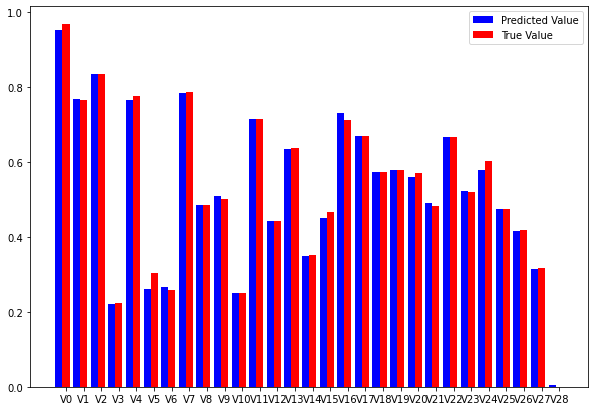

In [19]:
import matplotlib.pyplot as plt
import numpy as np

width = 0.8

index = 9

prediction = pred[index]
true_value = X_test[index]

indices = np.arange(len(prediction))

fig = plt.figure(figsize=(10,7))

plt.bar(indices, prediction, width=0.5*width, 
        color='b', label='Predicted Value')

plt.bar([i+0.5*width for i in indices], true_value, 
        width=0.5*width, color='r', label='True Value')

plt.xticks(indices+width/2., 
           ['V{}'.format(i) for i in range(len(prediction))] )

plt.legend()

plt.show()

As you can see, our model does a fine job at reconstructing the original values. The reconstructed values often match the true values, and if they don't, then they only deviate by a small margin. As you can see, visual inspection gives more insight than looking at abstract numbers.

## Visualising the Latent Spaces

We now have an autoencoder that takes in a credit card transaction and outputs a credit card transaction that looks more or less the same. However, this is not why we built the autoencoder. The main advantage of an autoencoder is that we can now encode the transaction into a lower dimensional representation that captures the main elements of the transaction.

To create the encoder model, all we have to do is to define a new Keras model that maps from the input to the encoded state:

In [20]:
encoder = Model(data_in, encoded)

Note that you don't need to train this model again. The layers keep the weights from the previously trained autoencoder.

To encode our data, we now use the encoder model:

In [21]:
enc = encoder.predict(X_test)

But how would we know whether these encodings contain any meaningful information about fraud? Once again, visual representation is key. While our encodings have fewer dimensions than the input data, they still have 12 dimensions. It's impossible for humans to think about a 12-dimensional space, so we need to draw our encodings in a lower dimensional space while still preserving the characteristics we care about.

In our case, the characteristic we care about is proximity. We want points that are close to each other in the 12-dimensional space to be close to each other in the 2-dimensional plot. More precisely, we care about the neighborhood. We want the points that are closest to each other in the high-dimensional space to also be closest to each other in the low-dimensional space.

Preserving the neighborhood is important because we want to find clusters of fraud. If we find that fraudulent transactions form a cluster in our high-dimensional encodings, then we can use a simple check if a new transaction falls into the fraud cluster to flag a transaction as fraudulent. A popular method to project high-dimensional data into low-dimensional plots while preserving neighborhoods is called t-distributed stochastic neighbor embedding, or t-SNE.

In a nutshell, t-SNE aims to faithfully represent the probability that two points are neighbors in a random sample of all points. That is, it tries to find a low-dimensional representation of data in which points in a random sample have the same probability of being the closest neighbors as in the high-dimensional data:

The steps are outlines in the slides.

In [22]:
np.savez('enc.npz',enc,y_test)

In [23]:
from sklearn.manifold import TSNE

Due to time constraints I run this for 1000 iterations.

In [24]:
tsne = TSNE(verbose=1, n_iter=5000)

In [25]:
res = tsne.fit_transform(enc)

C:\Users\apala\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\apala\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 28481 samples in 0.083s...
[t-SNE] Computed neighbors for 28481 samples in 25.871s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28481
[t-SNE] Computed conditional probabilities for sample 2000 / 28481
[t-SNE] Computed conditional probabilities for sample 3000 / 28481
[t-SNE] Computed conditional probabilities for sample 4000 / 28481
[t-SNE] Computed conditional probabilities for sample 5000 / 28481
[t-SNE] Computed conditional probabilities for sample 6000 / 28481
[t-SNE] Computed conditional probabilities for sample 7000 / 28481
[t-SNE] Computed conditional probabilities for sample 8000 / 28481
[t-SNE] Computed conditional probabilities for sample 9000 / 28481
[t-SNE] Computed conditional probabilities for sample 10000 / 28481
[t-SNE] Computed conditional probabilities for sample 11000 / 28481
[t-SNE] Computed conditional probabilities for sample 12000 / 28481
[t-SNE] Computed conditional probabilities for sa

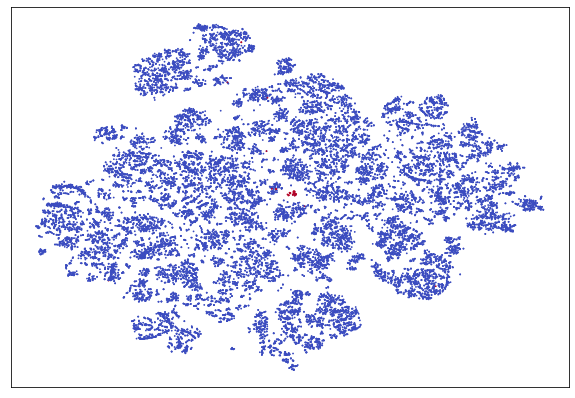

In [26]:
fig = plt.figure(figsize=(10,7))
scatter =plt.scatter(res[:,0],res[:,1],c=y_test,cmap='coolwarm', s=0.6)
scatter.axes.get_xaxis().set_visible(False)
scatter.axes.get_yaxis().set_visible(False)

We see that the fraudulent transactions appear to cluster.